In [65]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
#Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
sentinels = {'PRECIP': ['Nulo'],'EVAP':['Nulo'],'TMAX':['Nulo'],'TMIN':['Nulo']}

In [3]:
# Descarga los datos de la Información Climatológica por Estado.
# http://smn.cna.gob.mx/es/informacion-climatologica-por-estado?estado=son
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 20 renglones del inicio (encabezados)
df0 = pd.read_csv('Bacadehuachi.txt', skiprows=20, sep='\s+', header=None,names = ["DD/MM/AAAA", "PRECIP", "EVAP", "TMAX", "TMIN"],na_values=sentinels)
#Precipitación y Evaporación en milímetros.
#Temperatura máxima y mínima en °C.
# "Shift + Enter"
sns.set(rc={'figure.figsize':(12,8.27)})

In [4]:
# Convertir la columna Fecha a una variable tiempo.
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['DD/MM/AAAA'] , 1), dayfirst=True)
df0 = df0.drop(['DD/MM/AAAA'], 1)

In [5]:
df0.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA
0,0.0,4.4,32.0,15.0,1963-11-01
1,0.0,2.9,39.0,14.0,1963-11-02
2,0.0,4.7,29.0,11.0,1963-11-03
3,0.0,4.3,29.0,12.0,1963-11-04
4,0.0,3.9,28.0,11.0,1963-11-05


In [6]:
#Creamos una nueva columna columna para el mes.
#La tabla solo tiene los meses de noviembre y diciembre del año 1963, y enero de 1964.
df0['MES'] = df0['FECHA'].dt.month
df0['AÑO'] = df0['FECHA'].dt.year
df0.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO
0,0.0,4.4,32.0,15.0,1963-11-01,11,1963
1,0.0,2.9,39.0,14.0,1963-11-02,11,1963
2,0.0,4.7,29.0,11.0,1963-11-03,11,1963
3,0.0,4.3,29.0,12.0,1963-11-04,11,1963
4,0.0,3.9,28.0,11.0,1963-11-05,11,1963


In [7]:
df0.count

<bound method DataFrame.count of        PRECIP  EVAP  TMAX  TMIN      FECHA  MES   AÑO
0         0.0   4.4  32.0  15.0 1963-11-01   11  1963
1         0.0   2.9  39.0  14.0 1963-11-02   11  1963
2         0.0   4.7  29.0  11.0 1963-11-03   11  1963
3         0.0   4.3  29.0  12.0 1963-11-04   11  1963
4         0.0   3.9  28.0  11.0 1963-11-05   11  1963
5         0.0   4.3  29.0   5.0 1963-11-06   11  1963
6         0.0   2.9  30.0   4.0 1963-11-07   11  1963
7         0.0   3.4  23.0   6.0 1963-11-08   11  1963
8         0.0   2.9  20.0   6.0 1963-11-09   11  1963
9         0.0   2.4  27.0   4.0 1963-11-10   11  1963
10        0.0   4.4  31.0   5.0 1963-11-11   11  1963
11        0.0   4.9  32.0   6.0 1963-11-12   11  1963
12        0.0   3.0  32.0   6.0 1963-11-13   11  1963
13        0.0   4.6  32.0   7.0 1963-11-14   11  1963
14        0.0   3.4  31.0   9.0 1963-11-15   11  1963
15        0.0   3.1  29.0   6.0 1963-11-16   11  1963
16        7.4   4.5  27.0   6.0 1963-11-17   11  

In [8]:
#1

#Número de días con heladas por año (Tmin < 0°C)
#Para crear de una vez el Data frame con los datos de los años y el número de heladas, creamos dos arreglos d1 y d2.
d1=[]
d2=[]

#Hacemos un loop que recorra todos los años de la tabla.
#year es el arreglo de los años.
#k guardará todas las temperaturas mínimas de cada año.
#ki será un arreglo que guardará los días donde la temperatura mínima es menor de 0 grados.
#Asignamos los valores a los arreglos d1 y d2 y creamos el Data frame df1.

for i in range (0,49):
    inicio = 1963
    year = inicio + i
    k = df0[df0.AÑO==year].TMIN
    ki = len([1 for x in k if x<0])
    d1.append(year)
    d2.append(ki)
df1 = pd.DataFrame({"AÑO" : d1, "HELADAS" : d2})
df1

,AÑO,HELADAS
0,1963,6
1,1964,35
2,1965,18
3,1966,37
4,1967,20
5,1968,25
6,1969,3
7,1970,9
8,1971,44
9,1972,11


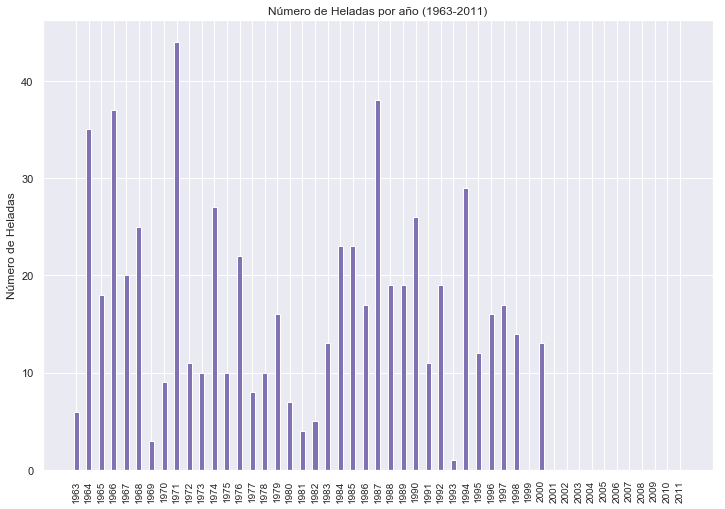

In [9]:
#Graficamos las heladas totales por año.
inicio = 1963
YEAR = [inicio + i for i in range(0, 49)]
date = YEAR
T = np.arange(len(date))
freeze = df1.HELADAS

plt.bar(T, freeze, width=0.4, align='center', color = 'm')
plt.xticks(T, date, size='small', rotation=90)
plt.ylabel('Número de Heladas')
plt.title('Número de Heladas por año (1963-2011)')
plt.savefig('Heladas',plt=2000)
plt.show()

In [10]:
#2

#Número de días de verano por año (Tmax > 25°C)
#Para crear de una vez el Data frame con los datos de los años y el número de días de verano, creamos dos arreglos d3 y d4.
d3=[]
d4=[]

#Hacemos un loop que recorra todos los años de la tabla.
#year es el arreglo de los años.
#k guardará todas las temperaturas máximas de cada año.
#ki será un arreglo que guardará los días donde la temperatura máxima es mayor de 25 grados.
#Asignamos los valores a los arreglos d3 y d4 y creamos el Data frame df2.

for i in range (0,49):
    inicio = 1963
    year = inicio + i
    k = df0[df0.AÑO==year].TMAX
    ki = len([1 for x in k if x>25])
    d3.append(year)
    d4.append(ki)
df2 = pd.DataFrame({"AÑO" : d3, "DÍASdeVERANO" : d4})
df2

,AÑO,DÍASdeVERANO
0,1963,15
1,1964,240
2,1965,263
3,1966,251
4,1967,278
5,1968,235
6,1969,256
7,1970,270
8,1971,262
9,1972,254


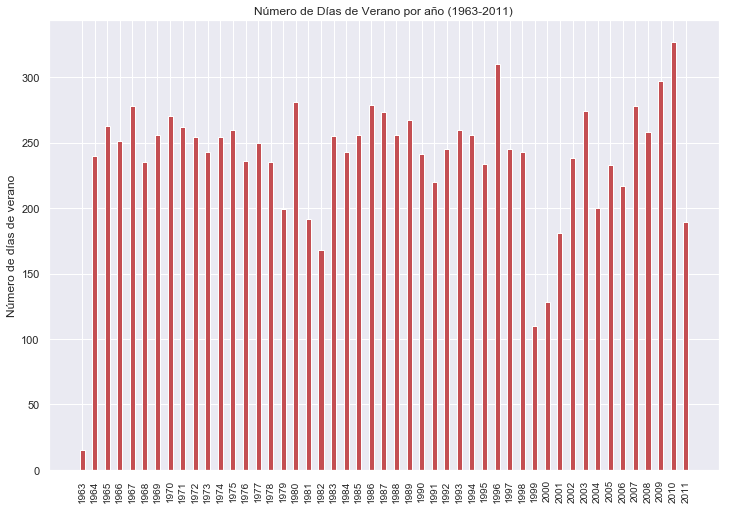

In [11]:
#Graficamos los días de verano totales por año.
inicio = 1963
YEAR = [inicio + i for i in range(0, 49)]
date = YEAR
T = np.arange(len(date))
summer = df2.DÍASdeVERANO

plt.bar(T, summer, width=0.4, align='center', color = 'r')
plt.xticks(T, date, size='small', rotation=90)
plt.ylabel('Número de días de verano')
plt.title('Número de Días de Verano por año (1963-2011)')
plt.savefig('Días_verano',plt=2000)
plt.show()

In [12]:
#3

#Número de noches tropicales por año (Tmin > 20ºC)
#Para crear de una vez el Data frame con los datos de los años y el número noches tropicales, creando los arreglos d5 y d6.
d5=[]
d6=[]

#Hacemos un loop que recorra todos los años de la tabla.
#year es el arreglo de los años.
#k guardará todas las temperaturas mínimas de cada año.
#ki será un arreglo que guardará los días donde la temperatura mínima es mayor de 20 grados.
#Asignamos los valores a los arreglos d5 y d6 y creamos el Data frame df3.

for i in range (0,49):
    inicio = 1963
    year = inicio + i
    k = df0[df0.AÑO==year].TMIN
    ki = len([1 for x in k if x>20])
    d5.append(year)
    d6.append(ki)
df3 = pd.DataFrame({"AÑO" : d5, "NOCHES_TROPICALES" : d6})
df3


,AÑO,NOCHES_TROPICALES
0,1963,0
1,1964,60
2,1965,61
3,1966,57
4,1967,47
5,1968,38
6,1969,60
7,1970,55
8,1971,18
9,1972,51


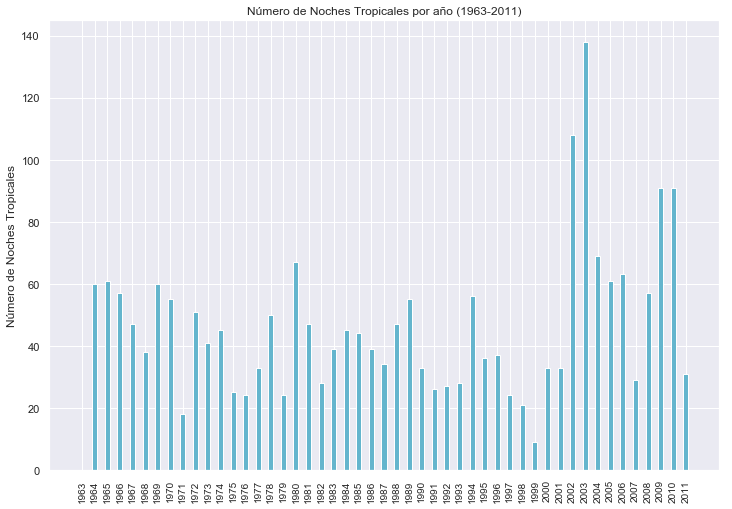

In [13]:
#Graficamos las noches tropicales totales por año.
inicio = 1963
YEAR = [inicio + i for i in range(0, 49)]
date = YEAR
T = np.arange(len(date))
trop = df3.NOCHES_TROPICALES

plt.bar(T, trop, width=0.4, align='center', color = 'c')
plt.xticks(T, date, size='small', rotation=90)
plt.ylabel('Número de Noches Tropicales')
plt.title('Número de Noches Tropicales por año (1963-2011)')
plt.savefig('Noches_Tropicales',plt=2000)
plt.show()

In [57]:
#4

#Creo una columna con la temperatura promedio por día en el data frame df0.
diffs = (df0.TMAX - df0.TMIN)
df0['DIFT'] = diffs
prom = (df0.TMAX + df0.TMIN)/2
df0['TP'] = prom
df0.head()

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO,DIFT,TPROM,TP
0,0.0,4.4,32.0,15.0,1963-11-01,11,1963,17.0,23.5,23.5
1,0.0,2.9,39.0,14.0,1963-11-02,11,1963,25.0,26.5,26.5
2,0.0,4.7,29.0,11.0,1963-11-03,11,1963,18.0,20.0,20.0
3,0.0,4.3,29.0,12.0,1963-11-04,11,1963,17.0,20.5,20.5
4,0.0,3.9,28.0,11.0,1963-11-05,11,1963,17.0,19.5,19.5


In [59]:
#llamamos prim a un arreglo vacío al cual pronto le asignaremos valores
prim = []
#llamamos ultprim a una variable que después utilizaremos
ultprim=-1
for j in range(df0["AÑO"][0],df0["AÑO"][len(df0)-1]+1):
    for i in range(5,len(df0)-1):
        if(df0["AÑO"][i-5] == j):
            if(df0["TP"][i-5] > 5 and df0["TP"][i-4] > 5 and df0["TP"][i-3] > 5 and
               df0["TP"][i-2] > 5 and df0["TP"][i-1] > 5 and df0["TP"][i]   > 5):
#el dato con índice i es el último de los primeros el cual nos interesa e insertamos su valor en una variable ultprim
                    ultprim = i
                    break
    if(ultprim != -1):
        prim.append(ultprim)
        ultprim= -1
    else:
        prim.append("NA")
        
prim


[5,
 66,
 432,
 800,
 1162,
 1527,
 1893,
 2258,
 2633,
 2988,
 3354,
 3719,
 4084,
 4449,
 4815,
 5180,
 5545,
 5879,
 6245,
 6519,
 6717,
 7082,
 7448,
 7813,
 8178,
 8543,
 8886,
 9221,
 9553,
 9888,
 10254,
 10617,
 10981,
 11285,
 11651,
 12046,
 12349,
 12472,
 12669,
 12999,
 13302,
 13612,
 13867,
 14112,
 14386,
 14751,
 15087,
 15452,
 15817]

In [61]:
#Haceos lo mismo pero con los ultimos 6 días (pero ahora la temperatura es menor que 5)
ult = []
primult = -1

for j in range(df0["AÑO"][len(df0)-1],df0["AÑO"][0]-1,-1):
    for i in range(len(df0)-1,5,-1):
        if(df0["AÑO"][i] == j):
            if(df0["TP"][i-5] < 5 and df0["TP"][i-4] < 5 and df0["TP"][i-3] < 5 and
               df0["TP"][i-2] < 5 and df0["TP"][i-1] < 5 and df0["TP"][i]   < 5):
                    primult = i-5
                    break
    if(primult != -1):
        ult.append(primult)
        primult= -1
    else:
        ult.append("NA")
        
ult

['NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA']

In [63]:
#Creamos un arreglo vacío llamado Per.
Periodo = []
start=df0['AÑO'][0]
for i in range(0,len(ult)):
    if(ult[i]!="NA" and prim[i]!="NA"):
        Periodo.append(ult[i]-prim[i])
    if(ult[i]=='NA'):
            Periodo.append( len(df0[df0['AÑO'] == start].index) )
    else:
        if(prim[i]=='NA'):
            Periodo.append(0)
    start=start+1
    
Periodo

[61,
 366,
 365,
 365,
 365,
 366,
 365,
 365,
 365,
 366,
 365,
 365,
 365,
 366,
 365,
 365,
 334,
 366,
 273,
 199,
 365,
 366,
 365,
 365,
 365,
 343,
 335,
 332,
 335,
 366,
 363,
 364,
 304,
 366,
 364,
 334,
 122,
 197,
 331,
 303,
 303,
 262,
 245,
 274,
 365,
 336,
 365,
 365,
 212]

In [60]:
#5

#Temperatura máxima mensual de la temperatura máxima (máxima de la máxima)
#Para crear de una vez el Data frame con los datos de los meses y la Tmáxima, creamos dos arreglos d9 y d10.

d9=[]
d10=[]
for i in range (0,12):
    inicio = 1
    mes = inicio + i
    k = df0[df0.MES==mes].TMAX.max()
    d9.append(mes)
    d10.append(k)
df5 = pd.DataFrame({"MES" : d9, "TMAXmax" : d10})
df5


,MES,TMAXmax
0,1,32.0
1,2,35.0
2,3,38.0
3,4,41.0
4,5,44.5
5,6,46.5
6,7,49.0
7,8,48.0
8,9,45.0
9,10,42.0


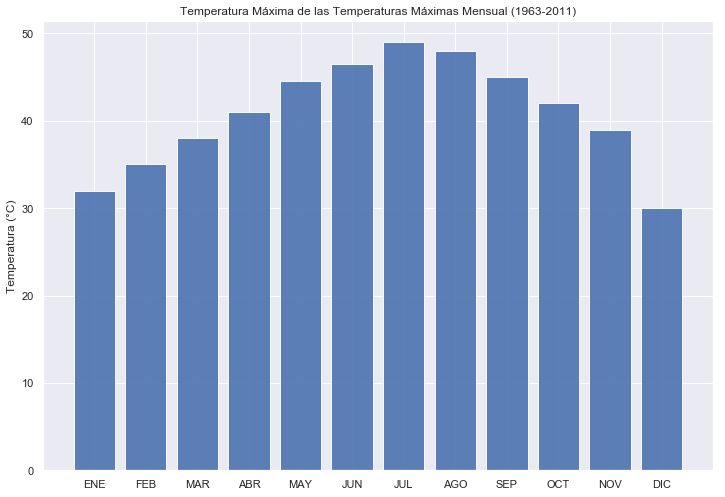

In [17]:
#Graficamos las temperaturas máximas máximas por mes.
meses = ('ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC')
#Para que la tabla abarque los valores de los promedio de las precipitaciones.
y_pos = np.arange(len(meses))
Tmax = df5.TMAXmax

#Para hacer la gráfica:
plt.bar(y_pos, Tmax,align='center', alpha=0.9)

#Poner los meses en el eje de las "x".
plt.xticks(y_pos, meses)
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Máxima de las Temperaturas Máximas Mensual (1963-2011)')
plt.savefig('Tmaxmax',plt=2000)
plt.show()

In [66]:
#6

#Temperatura máxima mensual de la temperatura mínima
#Para crear de una vez el Data frame con los datos de los meses y la Tmáxima, creamos dos arreglos d11 y d12.

d11=[]
d12=[]
for i in range (0,12):
    inicio = 1
    mes = inicio + i
    k = df0[df0.MES==mes].TMIN.max()
    d11.append(mes)
    d12.append(k)
df6 = pd.DataFrame({"MES" : d11, "TMAXmin" : d12})
df6

,MES,TMAXmin
0,1,13.0
1,2,14.0
2,3,19.0
3,4,20.0
4,5,29.0
5,6,29.0
6,7,34.0
7,8,29.0
8,9,29.0
9,10,29.0


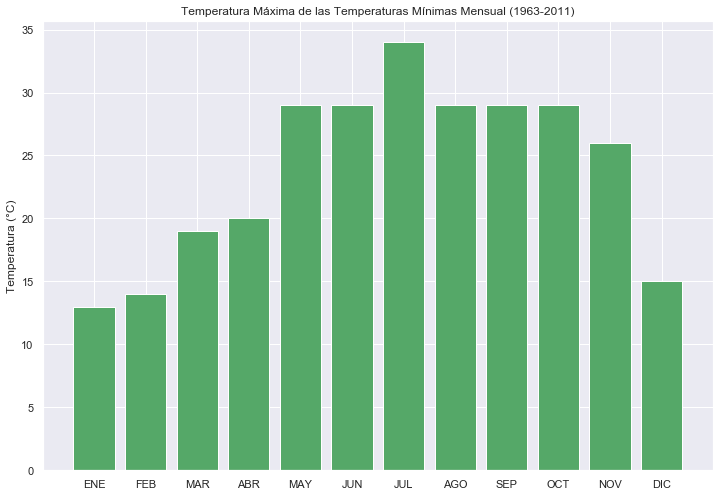

In [38]:
#Graficamos las temperaturas máximas mínimas
#Para que la tabla abarque los valores de los promedio de las precipitaciones.
y_pos = np.arange(len(meses))
Tmax = df6.TMAXmin

#Para hacer la gráfica:
plt.bar(y_pos, Tmax,align='center', color = 'g')

#Poner los meses en el eje de las "x".
plt.xticks(y_pos, meses)
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Máxima de las Temperaturas Mínimas Mensual (1963-2011)')
plt.savefig('Tmaxmin',plt=2000)
plt.show()

In [67]:
#7

#Temperatura mínima mensual de las temperaturas máximas.
#Para crear de una vez el Data frame con los datos de los meses y la Tmínima, creamos dos arreglos d13 y d14.

d13=[]
d14=[]
for i in range (0,12):
    inicio = 1
    mes = inicio + i
    k = df0[df0.MES==mes].TMAX.min()
    d13.append(mes)
    d14.append(k)
df7 = pd.DataFrame({"MES" : d13, "TMINmax" : d14})
df7


,MES,TMINmax
0,1,10.0
1,2,9.5
2,3,11.0
3,4,12.5
4,5,23.0
5,6,20.0
6,7,23.5
7,8,23.0
8,9,22.0
9,10,13.0


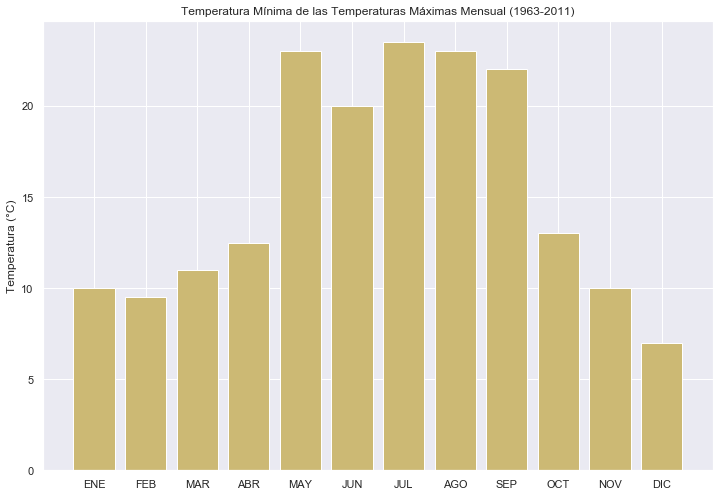

In [40]:
#Graficamos las temperaturas mínimas máximas
#Para que la tabla abarque los valores de los promedio de las precipitaciones.
y_pos = np.arange(len(meses))
Tmin = df7.TMINmax

#Para hacer la gráfica:
plt.bar(y_pos, Tmin,align='center', color = 'y')

#Poner los meses en el eje de las "x".
plt.xticks(y_pos, meses)
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Mínima de las Temperaturas Máximas Mensual (1963-2011)')
plt.savefig('Tminmax',plt=2000)
plt.show()

In [41]:
#8

#Temperatura mínima mensual de las temperaturas mínimas.
#Para crear de una vez el Data frame con los datos de los meses y la Tmínima, creamos dos arreglos d15 y d16.

d15=[]
d16=[]
for i in range (0,12):
    inicio = 1
    mes = inicio + i
    k = df0[df0.MES==mes].TMIN.min()
    d15.append(mes)
    d16.append(k)
df8 = pd.DataFrame({"MES" : d15, "TMINmin" : d16})
df8


,MES,TMINmin
0,1,-8.0
1,2,-5.0
2,3,-5.0
3,4,-2.0
4,5,2.0
5,6,9.0
6,7,14.1
7,8,10.0
8,9,7.0
9,10,0.0


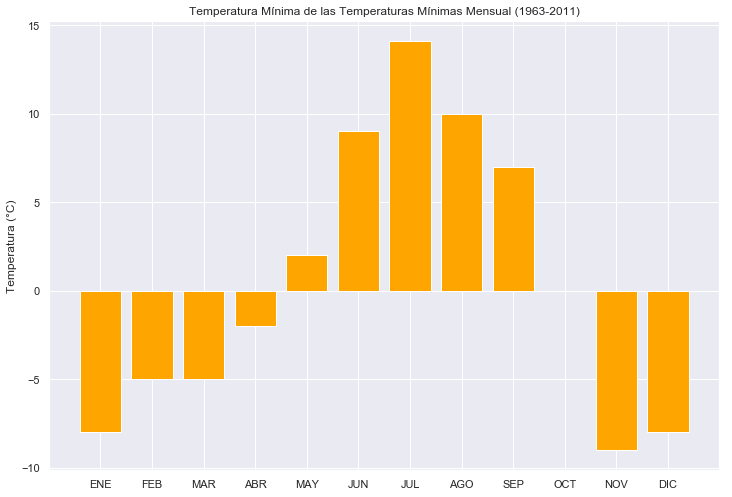

In [42]:
#Graficamos las temperaturas mínimas mínimas
#Para que la tabla abarque los valores de los promedio de las precipitaciones.
y_pos = np.arange(len(meses))
Tmin = df8.TMINmin

#Para hacer la gráfica:
plt.bar(y_pos, Tmin,align='center', color = 'orange')

#Poner los meses en el eje de las "x".
plt.xticks(y_pos, meses)
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Mínima de las Temperaturas Mínimas Mensual (1963-2011)')
plt.savefig('Tminmin',plt=2000)
plt.show()

In [43]:
#9

#Promedio mensual de la diferncia de temperatura.
#Para crear de una vez el Data frame con los datos de los meses y el promedio de diferencias, creamos dos arreglos d17 y d18.

d17=[]
d18=[]

for i in range (0,12):
    inicio = 1
    mes = inicio + i
    k = df0[df0.MES==mes].DIFT.mean()
    d17.append(mes)
    d18.append(k)
df9 = pd.DataFrame({"AÑO" : d17, "PromTemp" : d18})
df9


,AÑO,PromTemp
0,1,18.919829
1,2,19.395969
2,3,20.278310
3,4,21.303614
4,5,21.086676
5,6,19.554738
6,7,15.849289
7,8,15.434485
8,9,17.030418
9,10,19.435901


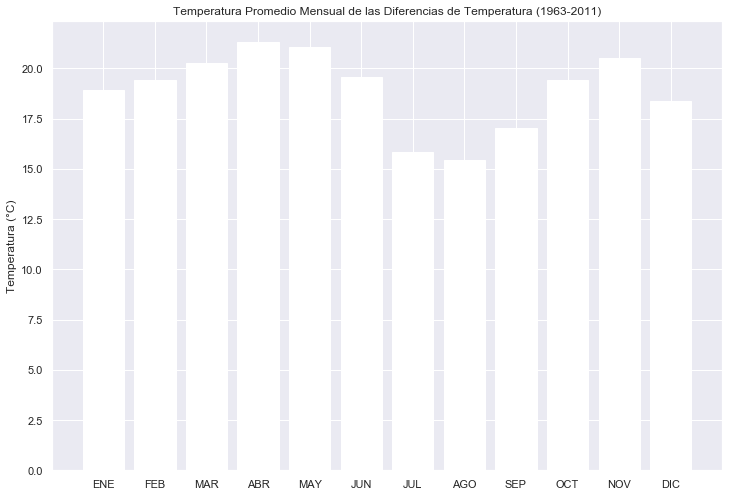

In [45]:
#Graficamos el promedio de las diferencias de temperaturas
#Para que la tabla abarque los valores de los promedio de las temperaturas.
y_pos = np.arange(len(meses))
Tprom = df9.PromTemp

#Para hacer la gráfica:
plt.bar(y_pos, Tprom,align='center', color = 'white')

#Poner los meses en el eje de las "x".
plt.xticks(y_pos, meses)
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Promedio Mensual de las Diferencias de Temperatura (1963-2011)')
plt.savefig('TPromDif',plt=2000)
plt.show()

In [46]:
#10

#La cantidad máxima de precipitación de cada mes.  

d19=[]
d20=[]

for i in range (0,12):
    inicio = 1
    mes = inicio + i
    k = df0[df0.MES==mes].PRECIP.max()
    d19.append(mes)
    d20.append(k)
df10 = pd.DataFrame({"MES" : d19, "PRECIP_MÁX" : d20})
df10


,MES,PRECIP_MÁX
0,1,41.5
1,2,50.0
2,3,37.0
3,4,35.0
4,5,31.0
5,6,50.0
6,7,69.0
7,8,93.2
8,9,52.8
9,10,68.0


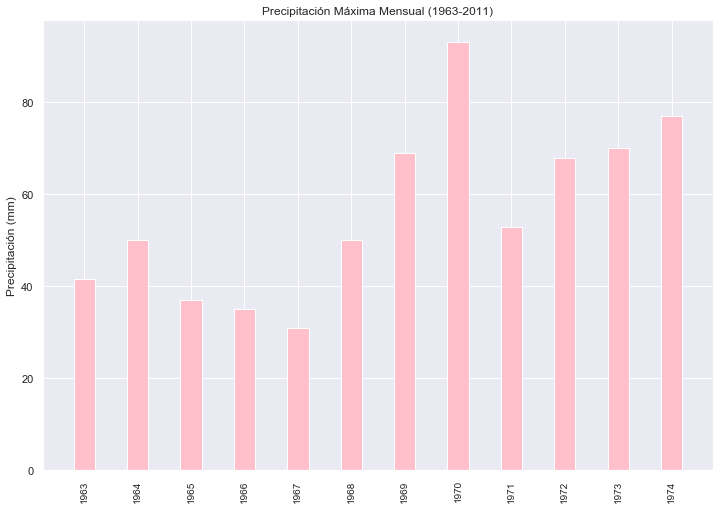

In [47]:
#Graficamos la precipitación máxima mensual.

T = np.arange(len(meses))
pmax = df10.PRECIP_MÁX

plt.bar(T, pmax, width=0.4, align='center', color = 'pink')
plt.xticks(T, date, size='small', rotation=90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Máxima Mensual (1963-2011)')
plt.savefig('PrecipMáxMensual',plt=2000)
plt.show()

Text(0.5, 1.0, 'precipitación diaria max en 5 días consecutivos')

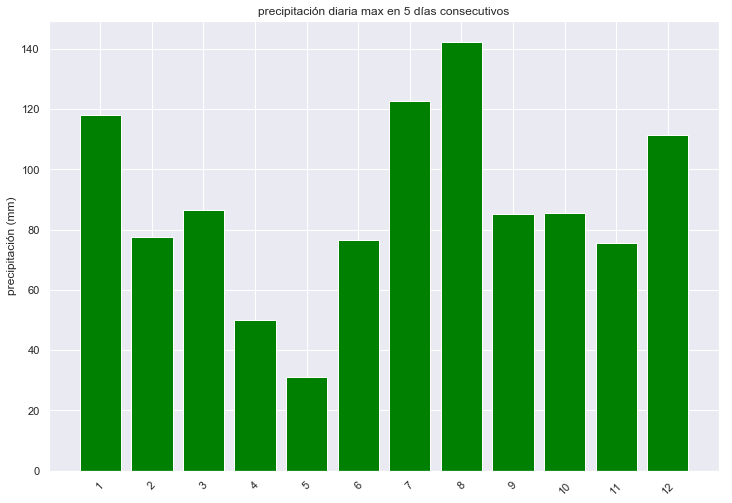

In [77]:
#11

#Precipitación diaria máxima mensual en 5 días consecutivos.

datos1=[]
datos2=[]
datos3=[]
pmax=[]
count=[]
p=[]
meses=[]

for i in range(0,49):
    f3=pd.DataFrame({"MESES": df0[df0.AÑO==(1963+i)].MES,"PRECIP": df0[df0.AÑO==(1963+i)].PRECIP})
    for j in range (0,12):
        count.append(j+1)
        f4=pd.DataFrame({"PRECIP": f3[f3.MESES==j+1].PRECIP})
        k=len(f4)
        f4.index = np.arange(0,k)
        for c in range(0,k-5):
            j1=f4.PRECIP[c]
            j2=f4.PRECIP[c+1]
            j3=f4.PRECIP[c+2]
            j4=f4.PRECIP[c+3]
            j5=f4.PRECIP[c+4]
            if(j1 !=0.0 and j2 !=0.0, j3 !=0.0 and j4 !=0.0 and j5 !=0.0):
                v=j1+j2+j3+j4+j5
                j1=j2=j3=j4=j5=0
                datos2.append(v)
            else:
                datos2.append(0)
        f5=pd.DataFrame({"P":datos2})
        s=f5.P.max()
        pmax.append(s)
        datos2=[]
for i in range (0,49):
    for x in range (0,12):
        meses.append(x+1)
f7=pd.DataFrame({"MESES":meses,"P5":pmax})
meses=[]
count=[]
for i in range(0,12):
    count.append(i+1)
    l=f7[f7.MESES==i+1].P5.max()
    meses.append(l)
f8=pd.DataFrame({"MESES":count,"Pmax5":meses})

x=f8.MESES
y=np.arange(len(x))
p=f8.Pmax5
#p

plt.bar(y,p,align='center',color='green')
plt.xticks(y,x, rotation=45)
plt.ylabel('precipitación (mm)')
plt.title("precipitación diaria max en 5 días consecutivos")


In [50]:
#12

#Número de días en un año con precipitación mayor igual a 1mm.
#Para crear de una vez el Data frame con los datos de los años y el número de días de verano, creamos dos arreglos d3 y d4.
d23=[]
d24=[]

for i in range (0,49):
    inicio = 1963
    year = inicio + i
    k = df0[df0.AÑO==year].PRECIP
    ki = len([1 for x in k if x>=1])
    d23.append(year)
    d24.append(ki)
df12 = pd.DataFrame({"AÑO" : d23, "NumPrecip1mm" : d24})
df12

,AÑO,NumPrecip1mm
0,1963,5
1,1964,51
2,1965,53
3,1966,45
4,1967,45
5,1968,53
6,1969,35
7,1970,32
8,1971,42
9,1972,43


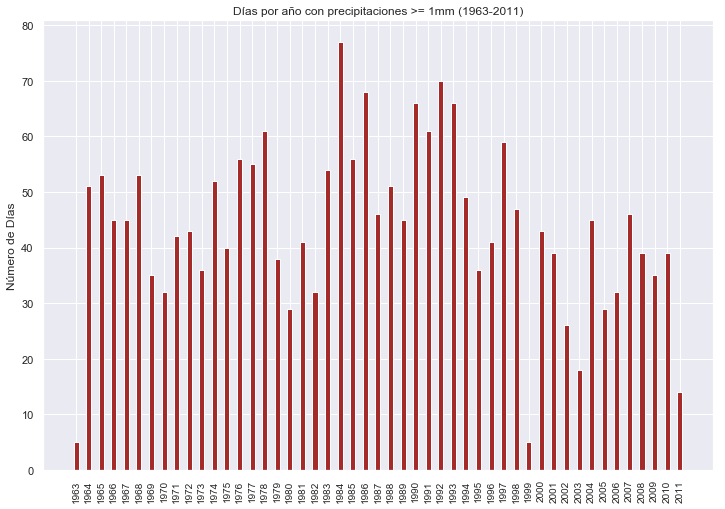

In [51]:
#Graficamos las precipitaciones por año donde la precipitación haya sido mayor o igual a 1 mm.
inicio = 1963
YEAR = [inicio + i for i in range(0, 49)]
date = YEAR
T = np.arange(len(date))
precip1 = df12.NumPrecip1mm

plt.bar(T, precip1, width=0.4, align='center', color = 'brown')
plt.xticks(T, date, size='small', rotation=90)
plt.ylabel('Número de Días')
plt.title('Días por año con precipitaciones >= 1mm (1963-2011)')
plt.savefig('Precip1',plt=2000)
plt.show()

In [52]:
#13

#Número de días en el año con precipitación diaria mayor igual a 10 mm
d25=[]
d26=[]

for i in range (0,49):
    inicio = 1963
    year = inicio + i
    k = df0[df0.AÑO==year].PRECIP
    ki = len([1 for x in k if x>=10])
    d25.append(year)
    d26.append(ki)
df13 = pd.DataFrame({"AÑO" : d25, "NumPrecip10mm" : d26})
df13


,AÑO,NumPrecip10mm
0,1963,0
1,1964,23
2,1965,23
3,1966,16
4,1967,21
5,1968,20
6,1969,14
7,1970,17
8,1971,12
9,1972,17


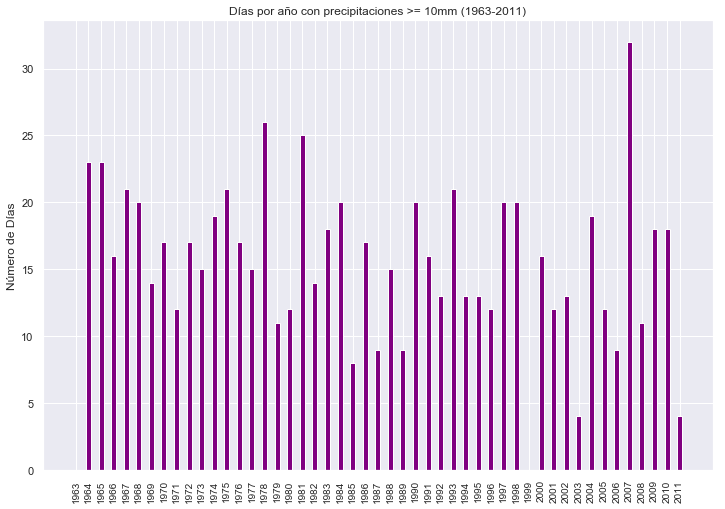

In [53]:
#Graficamos las precipitaciones por año donde la precipitación haya sido mayor o igual a 10 mm.
inicio = 1963
YEAR = [inicio + i for i in range(0, 49)]
date = YEAR
T = np.arange(len(date))
precip10 = df13.NumPrecip10mm

plt.bar(T, precip10, width=0.4, align='center', color = 'purple')
plt.xticks(T, date, size='small', rotation=90)
plt.ylabel('Número de Días')
plt.title('Días por año con precipitaciones >= 10mm (1963-2011)')
plt.savefig('Precip10',plt=2000)
plt.show()

In [54]:
#14

#Número de días en el año con precipitación diaria mayor igual a 20mm.
d27=[]
d28=[]

for i in range (0,49):
    inicio = 1963
    year = inicio + i
    k = df0[df0.AÑO==year].PRECIP
    ki = len([1 for x in k if x>=20])
    d27.append(year)
    d28.append(ki)
df14 = pd.DataFrame({"AÑO" : d27, "NumPrecip20mm" : d28})
df14


,AÑO,NumPrecip20mm
0,1963,0
1,1964,10
2,1965,9
3,1966,8
4,1967,10
5,1968,9
6,1969,7
7,1970,8
8,1971,3
9,1972,6


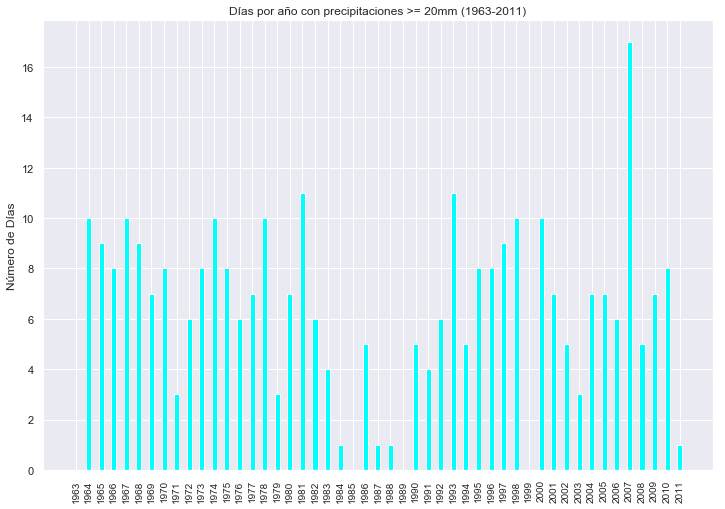

In [55]:
#Graficamos las precipitaciones por año donde la precipitación haya sido mayor o igual a 10 mm.
inicio = 1963
YEAR = [inicio + i for i in range(0, 49)]
date = YEAR
T = np.arange(len(date))
precip20 = df14.NumPrecip20mm

plt.bar(T, precip20, width=0.4, align='center', color = 'cyan')
plt.xticks(T, date, size='small', rotation=90)
plt.ylabel('Número de Días')
plt.title('Días por año con precipitaciones >= 20mm (1963-2011)')
plt.savefig('Precip20',plt=2000)
plt.show()

In [72]:
#15

#Número de días consecutivos secos, sin precipitación o precipitación < 1mm

sec_año = []
sec = []
días = 0

inicio=df0['AÑO'][0]
Año=df0['AÑO'].nunique()

for i in range(0,Año):
    AñoE = df0[df0['AÑO']==inicio]
    AñoE = AñoE.reset_index()
    for j in range(0,len(AñoE)):
        if(AñoE['PRECIP'][j]<1):
            días = días + 1
        else:
            sec_año.append(días)
            días=0
    sec_max=max(sec_año)
    sec_año = []
    sec.append(sec_max)
    inicio=inicio+1
sec

[20,
 82,
 91,
 74,
 153,
 82,
 101,
 71,
 158,
 69,
 61,
 112,
 111,
 61,
 58,
 119,
 96,
 109,
 96,
 50,
 50,
 89,
 54,
 80,
 40,
 46,
 56,
 52,
 64,
 34,
 34,
 58,
 137,
 147,
 37,
 71,
 95,
 37,
 69,
 127,
 141,
 86,
 71,
 92,
 99,
 95,
 134,
 51,
 256]

In [73]:
#16

#Número de días consecutivos húmedos, con precipitación igual o mayor a 1mm. 
hum_año = []
hum = []
días = 0

inicio=df0['AÑO'][0]
Años=df0['AÑO'].nunique()

for i in range(0,Años):
    AñoE = df0[df0['AÑO']==inicio]
    AñoE = AñoE.reset_index()
    for j in range(0,len(AñoE)):
        if(AñoE['PRECIP'][j]>=1):
            días = días + 1
        else:
            hum_año.append(días)
            días=0
    hum_max=max(hum_año)
    hum_año = []
    hum.append(hum_max)
    inicio=inicio+1

hum

[3,
 5,
 5,
 9,
 7,
 4,
 4,
 5,
 3,
 3,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 3,
 7,
 4,
 6,
 10,
 5,
 7,
 3,
 3,
 4,
 7,
 9,
 4,
 5,
 3,
 8,
 6,
 4,
 3,
 1,
 4,
 4,
 6,
 3,
 4,
 5,
 5,
 4,
 5,
 4,
 3,
 3]